<a href="https://colab.research.google.com/github/elsanorm17/FakeNews_Project/blob/main/FakeNews_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fake News Project
This project contains two datasets, one of fake news and the other of real news.

This data was sourced from https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset


In [ ]:
#@title Load your dataset
import pandas as pd

!wget -q --show-progress "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20%2B%20X/Group/Journalism/Fake%20News/fake_news_data.csv"
!wget -q --show-progress "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20%2B%20X/Group/Journalism/Fake%20News/true_news_data.csv"
fake_news_data = pd.read_csv('fake_news_data.csv')
true_news_data = pd.read_csv('true_news_data.csv')

fake_news_data.csv  100%[===================>]  59.88M   113MB/s    in 0.5s    
true_news_data.csv  100%[===================>]  51.10M   127MB/s    in 0.4s    


In [ ]:
fake_news_data

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [ ]:
true_news_data

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [ ]:
fake_news_data.title[14567]

'OBAMA THROWS HILLARY UNDER THE BUS: E-mail Scandal Just Got Real With This Devastating Blow'

In [ ]:
# This is the complicated version -- https://www.nltk.org/api/nltk.tokenize.html

In [ ]:
a = fake_news_data.text[0]

In [ ]:
def simple_tokenize(a):
  return a.split()


In [ ]:
# capitalization
# how do you want to deal w punctuation -- you might want punctuation as a separate token or you might stripping words of punctuation
# write new tokenization function:
import string

punctuation = []
for char in string.punctuation:
  punctuation.append(char)

#separates punctuation in the middle of a word
def tokenize_full(string):
  tokenized_string = []

  for word in string.split():
    word = word.lower()

    if word[0] in punctuation:
      tokenized_string.append(word[0])
      word = word[1:]

    temp = word
    for i in range(len(temp)-1):
      if temp[i] in punctuation:
        end = word.index(temp[i])
        if end != 0:
          tokenized_string.append(word[:end])
        tokenized_string.append(word[end])
        word = word[end+1:]
    if len(word) > 0:
      if word[-1] in punctuation:
        if len(word) > 1:
          tokenized_string.append(word[:-1])
          word = word[-1]

      tokenized_string.append(word)

  return tokenized_string


#only separates punctuation at the beginning or end of a string
def tokenize_outside(string):
  tokenized_string = []

  for word in string.split():
    word = word.lower()

    if word[0] in punctuation:
      tokenized_string.append(word[0])
      word = word[1:]

    if word[-1] in punctuation:
      if len(word) > 1:
        tokenized_string.append(word[:-1])
        word = word[-1]

    tokenized_string.append(word)

  return tokenized_string


print(tokenize_full("(one-two)"))
print(tokenize_outside("(one-two)"))
#print(punctuation)

['(', 'one', '-', 'two', ')']
['(', 'one-two', ')']


In [ ]:
tokenize_full("inter-connected")

['inter', '-', 'connected']

In [ ]:
def bag_of_words(example_sentence):
  #tokenize a sentence
  sentence = tokenize_full(example_sentence)

  #return a dictionary of all of the words in the sentence mapped to how many times it occurs
  dictionary = {}

  for word in sentence:
    if word not in dictionary:
      dictionary[word] = 1
    else:
      dictionary[word] += 1

  return dictionary



  # "I want a big cat and a big dog"
  # I: 1, want:1, a: 2, big: 2, cat: 1, and:1, dog:1

print(bag_of_words("I want a big cat and a big dog"))

{'i': 1, 'want': 1, 'a': 2, 'big': 2, 'cat': 1, 'and': 1, 'dog': 1}


In [ ]:
def ngram(string, n=1):
  tokenized_string = tokenize_full(string)

  temp = []
  for i in range(len(tokenized_string) - n +1):
    new = ""
    for j in range(n):
      new += tokenized_string[i+j]
      if j+1 != n:
        new += " "
    temp.append(new)

  return temp


print(ngram("I want a big cat and a big dog", 2))

['i want', 'want a', 'a big', 'big cat', 'cat and', 'and a', 'a big', 'big dog']


In [ ]:
#copied from NLP preprocessing notebook

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')


def process_lang_data(text):
  '''
    For a given text, go through the process of tokenizing, removing stopwords,
    stemming / lemmatization, and removing punctuation. Return the cleaned text.
  '''
  cleaned_text = []
  punctuation = string.punctuation
  our_stopwords = stopwords.words('english')
  lemmatizer = WordNetLemmatizer()

  ### YOUR CODE HERE ###
  text = word_tokenize(text)
  our_stopwords.append('Reuters')
  for word in text:
    if (word not in our_stopwords): # and (word not in punctuation):(word not in punctuation): #
      word= word.lower()
      #word = lemmatizer.lemmatize(word)
      cleaned_text.append(word)

  ### END YOUR CODE  ###

  return cleaned_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
our_stopwords = stopwords.words('english')
print(our_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
def updated_process_lang_data(text):
  '''
    For a given text, go through the process of tokenizing, removing stopwords,
    stemming / lemmatization, and removing punctuation. Return the cleaned text.
  '''
  cleaned_text = []
  punctuation = string.punctuation
  our_stopwords = stopwords.words('english')
  lemmatizer = WordNetLemmatizer()

  ### YOUR CODE HERE ###
  text = word_tokenize(text)

  '''our_stopwords.append('Reuters')
  our_stopwords.append('(')
  our_stopwords.append(')')
  our_stopwords.append('-')
  our_stopwords.append('WASHINGTON')
  our_stopwords.append("'s")
  our_stopwords.append("n't")'''


  for word in text:
    if (word not in our_stopwords):
      #stem_word = lemmatizer.lemmatize(word)
      word = word.lower()
      cleaned_text.append(word)

  ### END YOUR CODE  ###

  return cleaned_text

def simple_process_lang_data(text):
  '''
    For a given text, go through the process of tokenizing, removing stopwords,
    stemming / lemmatization, and removing punctuation. Return the cleaned text.
  '''
  cleaned_text = []
  punctuation = string.punctuation
  our_stopwords = stopwords.words('english')
  lemmatizer = WordNetLemmatizer()

  ### YOUR CODE HERE ###
  text = word_tokenize(text)

  our_stopwords.append('Reuters')


  for word in text:
    if (word not in our_stopwords) and (word not in punctuation):
      #stem_word = lemmatizer.lemmatize(word)
      word = word.lower()
      cleaned_text.append(word)

  ### END YOUR CODE  ###

  return cleaned_text

In [ ]:
word_tokenize("he's")

['he', "'s"]

In [ ]:
new_text = []
new_title = []
classification = []

for i in range(len(fake_news_data.text)):
  new_text.append(fake_news_data.text[i])
  new_title.append(fake_news_data.title[i])
  classification.append(False)

for i in range(len(true_news_data.text)):
  new_text.append(true_news_data.text[i])
  new_title.append(true_news_data.title[i])
  classification.append(True)

new_data = {'title': new_title, 'text': new_text, 'classification': classification}
new_df = pd.DataFrame(new_data, columns= ['title','text','classification'])


#clean_text = []
#clean_title = []
#classification = []

#for i in range(len(fake_news_data.text)):
#  clean_text.append(tokenize_full(fake_news_data.text[i]))
#  clean_title.append(tokenize_full(fake_news_data.title[i]))
#  classification.append(False)

#for i in range(len(true_news_data.text)):
#  clean_text.append(tokenize_full(true_news_data.text[i]))
#  clean_title.append(tokenize_full(true_news_data.title[i]))
#  classification.append(True)

#clean_data = {'title': clean_title, 'text': clean_text, 'classification': classification}
#clean_df = pd.DataFrame(new_data, columns= ['title','text','classification'])

new_df.head()
#clean_df.head()

,title,text,classification
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,False
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,False
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",False
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",False
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,False


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

used_columns = ['text']

X = new_df[used_columns]
y = new_df['classification']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [ ]:
X_train= X_train.reset_index().drop(['index'],axis=1)

In [ ]:
y_train= y_train.reset_index().drop(['index'],axis=1)


In [ ]:
y_test= y_test.reset_index().drop(['index'],axis=1)

In [ ]:
X_test = X_test.reset_index().drop(['index'],axis=1)

In [ ]:
X_test

,index,text
0,42421,PARIS (Reuters) - France warned Iraq s Kurdish...
1,35640,JERUSALEM/LONDON (Reuters) - An Iranian blogge...
2,4150,Terrified and unable to accept that he s destr...
3,38340,DUBAI (Reuters) - Lebanon s Christian Maronite...
4,6370,While Republicans whine and complain that thei...
...,...,...
14812,35071,JERUSALEM (Reuters) - Israel rejected a U.N. v...
14813,39854,BANGKOK (Reuters) - A woman s 750-km (470-mile...
14814,10757,Fox News Harris Faulkner BLOWS UP the WHOLE R...
14815,26254,WASHINGTON (Reuters) - U.S. President Donald T...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

opt_bow = CountVectorizer(analyzer=process_lang_data, max_features=1000) # using the function we made above
opt_bow.fit(X_train['text'].tolist())                             # fitting to our training data
opt_bow_train = opt_bow.transform(X_train['text'].tolist()).toarray() # then transforming both training and testing data
opt_bow_test = opt_bow.transform(X_test['text'].tolist()).toarray()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

bow = CountVectorizer(analyzer=simple_process_lang_data, max_features=1000) # using the function we made above
bow.fit(X_train['text'].tolist())                             # fitting to our training data
bow_train = bow.transform(X_train['text'].tolist()).toarray() # then transforming both training and testing data
bow_test = bow.transform(X_test['text'].tolist()).toarray()

In [ ]:
bow_train.shape

(30081, 1000)

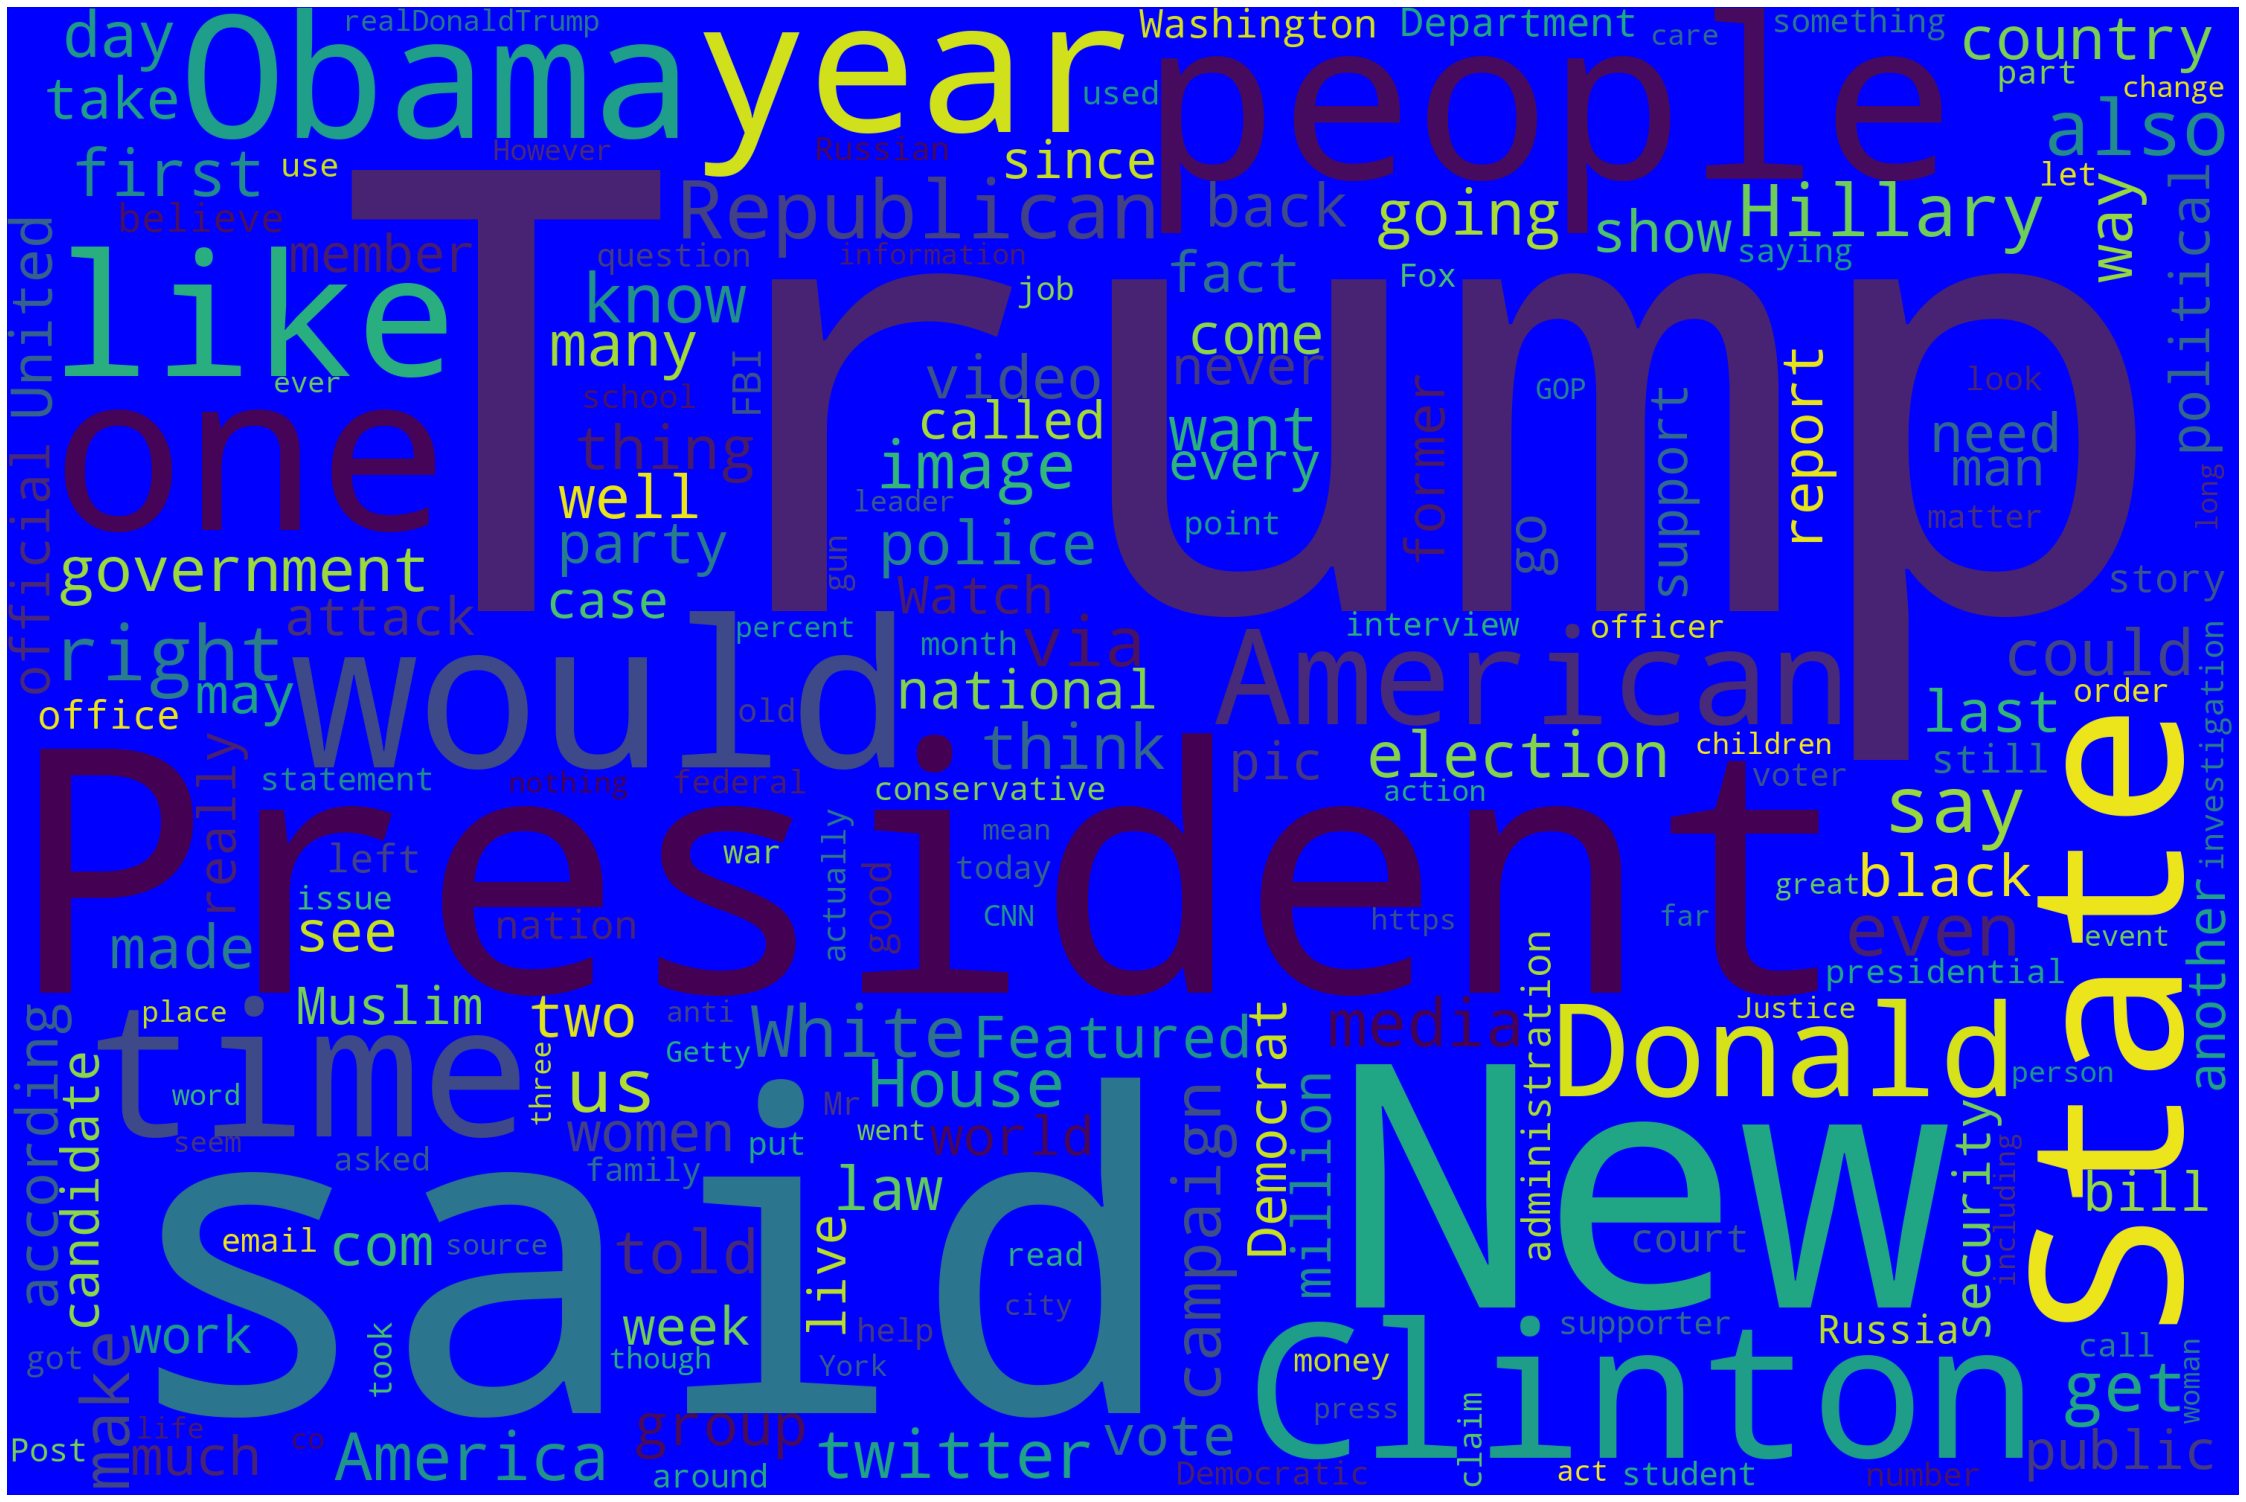

In [ ]:


import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

#generate word cloud

text = ""
for i in range(len(X_train["text"])):
  if y_train.classification[i] == False:
    text += X_train.text[i]

our_stopwords = stopwords.words('english')
our_stopwords.append('Reuters')
our_stopwords.append('U')
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='blue', collocations=False, stopwords = our_stopwords).generate(text)

plt.figure(figsize=(40, 30))

plt.imshow(wordcloud)

plt.axis("off")
plt.show()

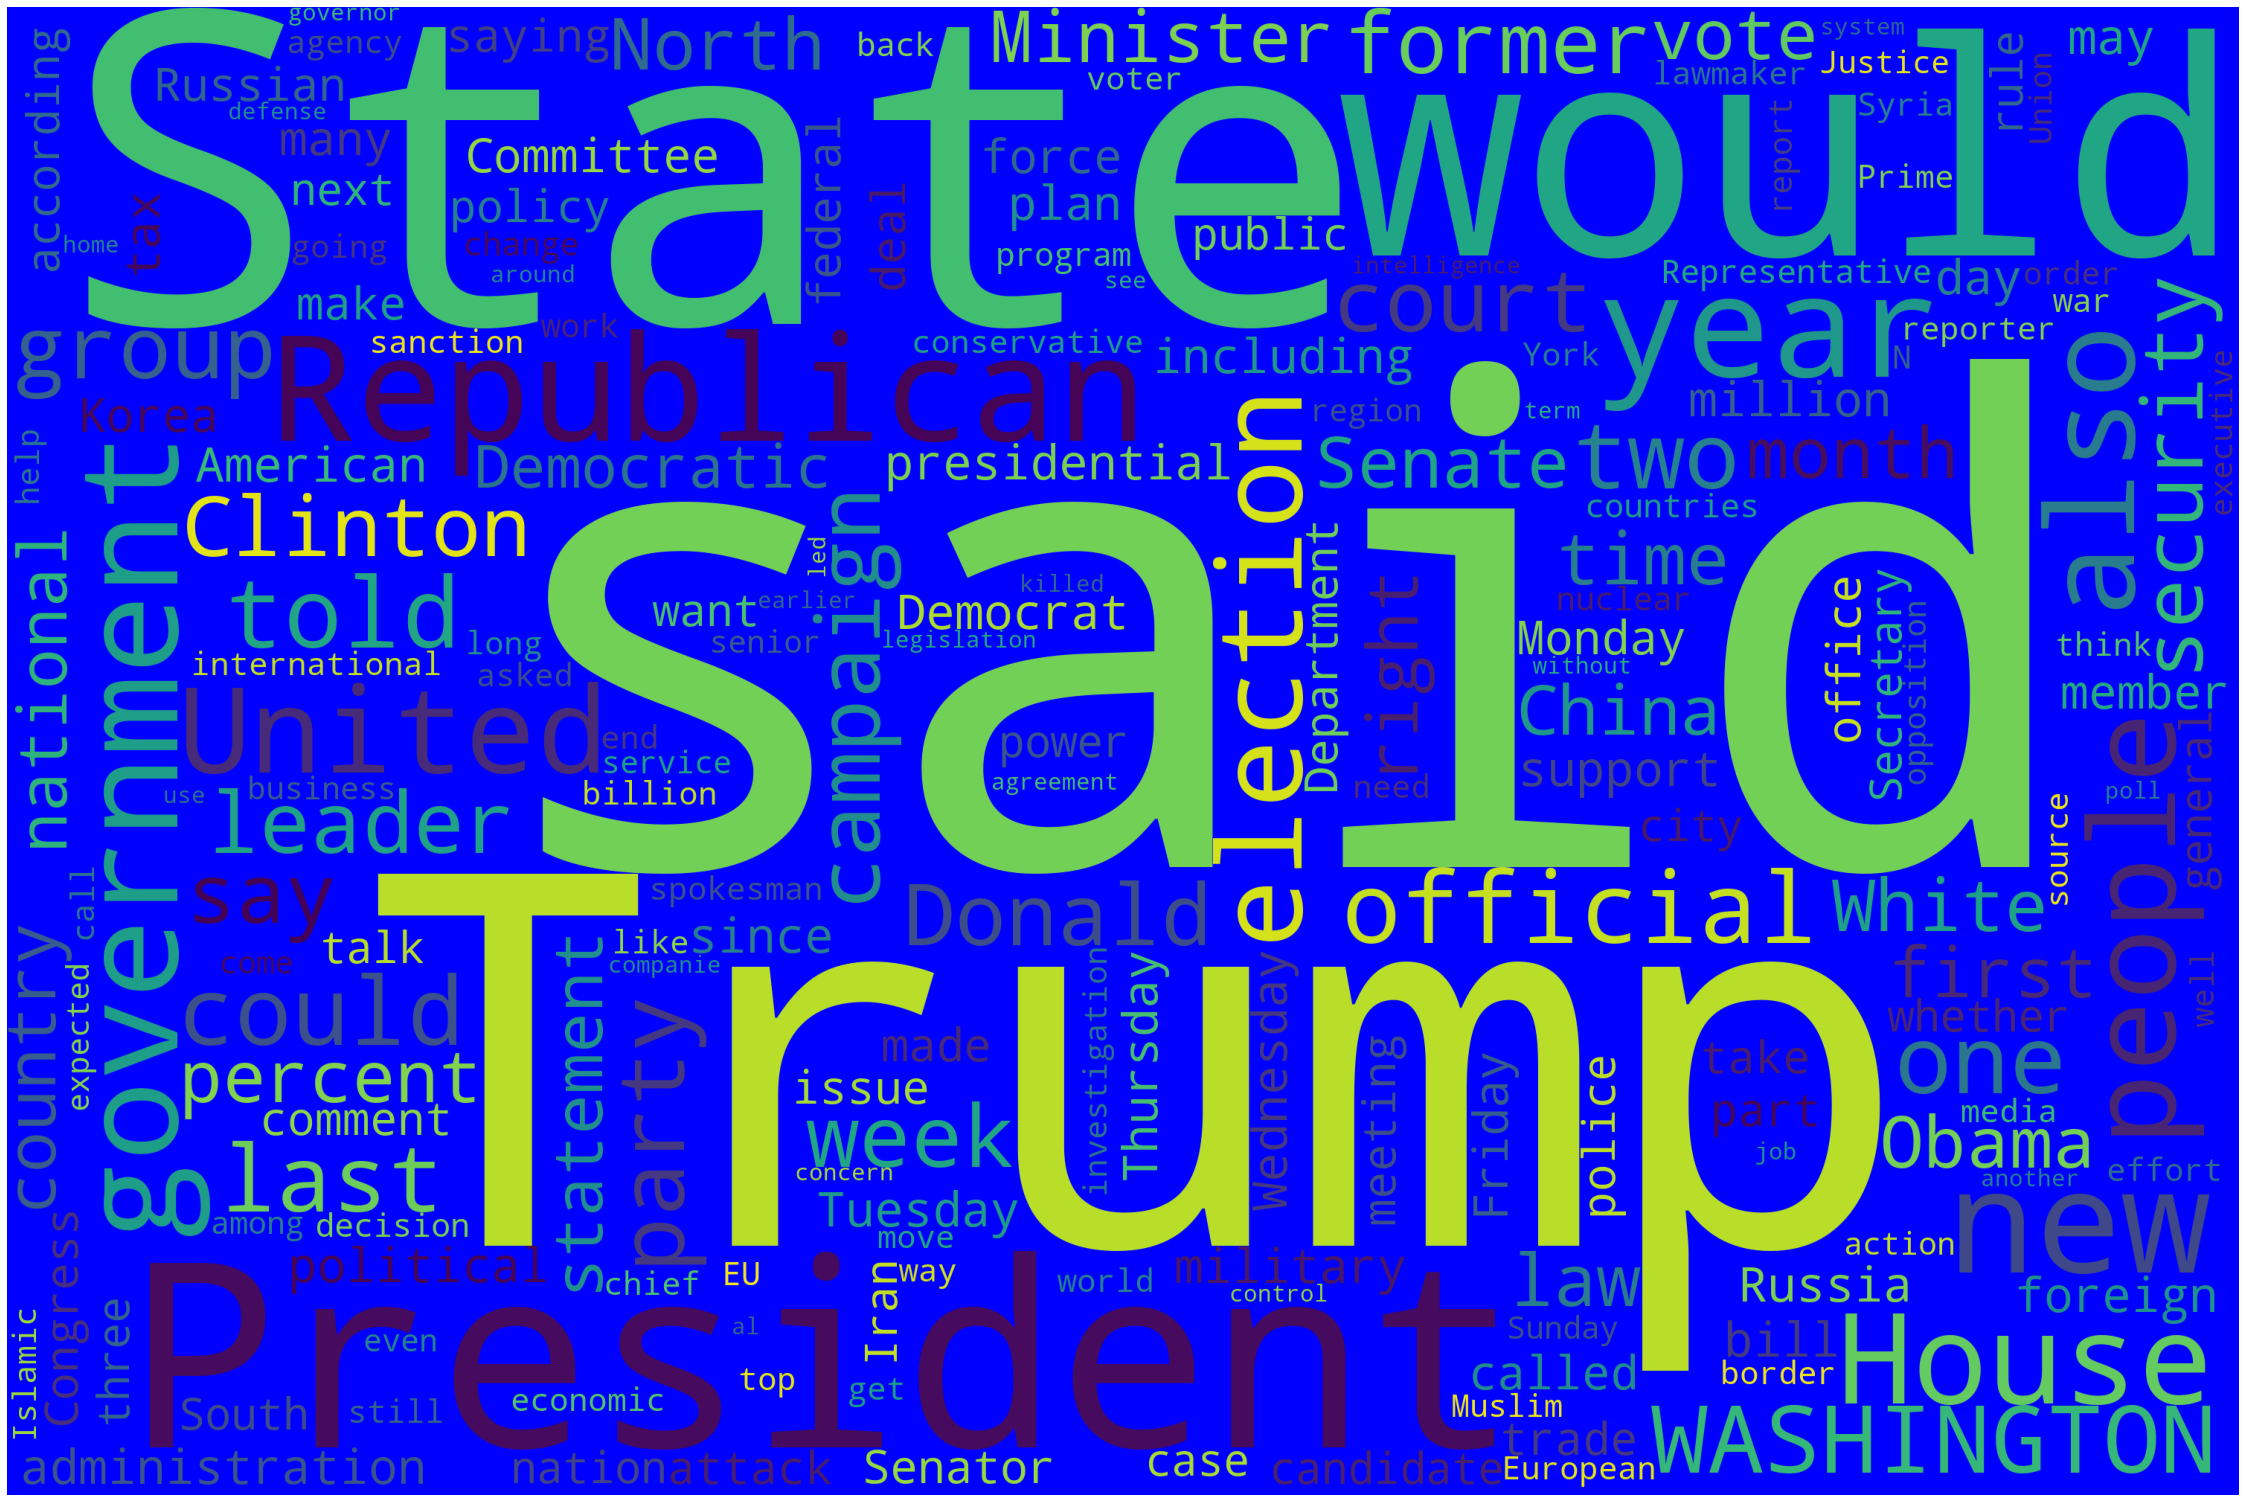

In [ ]:
text = ""
for i in range(len(X_train['text'])):
  if y_train.classification[i] == True:
    text += X_train.text[i]


wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='blue', collocations=False, stopwords = our_stopwords).generate(text)

plt.figure(figsize=(40, 30))

plt.imshow(wordcloud)

plt.axis("off")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()

In [ ]:
logistic_model.fit(bow_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
log_predictions = logistic_model.predict(bow_test)

In [ ]:
logistic_model.coef_[0,:].shape

(1000,)

In [ ]:

df = pd.DataFrame({'words':bow.get_feature_names_out(),'coefs':logistic_model.coef_[0,:]})

In [ ]:
df

,words,coefs
0,!,-0.833460
1,#,-0.400804
2,$,-0.312661
3,%,-1.826725
4,&,0.326789
...,...,...
995,years,0.302105
996,yet,-0.230865
997,york,0.460229
998,you,-1.432648


In [ ]:
df.sort_values(by=['coefs']).head(30)

,words,coefs
935,via,-4.720596
377,gop,-3.332328
424,images,-2.316070
462,j.,-2.175085
507,liberal,-2.124396
290,entire,-2.103109
714,read,-1.988836
235,daily,-1.965887
423,image,-1.954453
416,https,-1.847027


In [ ]:
df.sort_values(by=['coefs']).tail(30)

,words,coefs
89,anything,0.980961
236,dangerous,0.996259
305,executive,1.010934
456,island,1.022727
679,presidential,1.027198
499,led,1.032840
573,month,1.037689
904,total,1.050457
699,provide,1.111832
639,parliament,1.142593


In [ ]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, log_predictions)
print('Logistic Regression Model Accuracy: {:.2%}'.format(score))

Logistic Regression Model Accuracy: 98.40%


In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(bow_train, y_train.classification)

SVC()

In [ ]:
predictions = clf.predict(bow_test)
score = accuracy_score(y_test, predictions)
print('SVC Model Accuracy: {:.2%}'.format(score))

SVC Model Accuracy: 99.70%


In [ ]:
from sklearn import svm
lin_clf = svm.LinearSVC()
lin_clf.fit(bow_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC()

In [ ]:
from sklearn.metrics import accuracy_score

predictions = lin_clf.predict(bow_test)
score = accuracy_score(y_test, predictions)
print('Linear SVC Model Accuracy: {:.2%}'.format(score))

Linear SVC Model Accuracy: 97.89%


In [ ]:
#stop, lower, reuters [99.95, 99.74, 99.97]
#-stop, lower, reuters, -, ", ", ' [98.4, 98.4, 97.89]
#stop, punc, lemm [99.8, 99.74, 99.7]
#stop, punc, lemm, lower [99.76, 99.68, 99.66]
#-stop [99.93, 99.68, 99.93]
#stop, punc
#stop, lemm
#-punc [99.8, 99.52, 99.74]
#-lemm [99.93, 99.71, 99.93]
#lower [99.91, 99.68, 99.95]
#none [99.93, 99.7, 99.94]
#["Logistic Regression", "SVM", "Linear SVC"]

In [ ]:
change = ['None', 'lowercase', 'lemmatize', 'punctuation', 'stopwords', 'optimal']
score = [[99.93, 99.7, 99.94], [99.91, 99.68, 99.95], [99.93, 99.71, 99.93], [99.8, 99.52, 99.74], [99.93, 99.68, 99.93], [99.95, 99.74, 99.97]]
model = []
for i in range(6):
  model.append(["Logistic Regression", "SVM", "Linear SVC"])

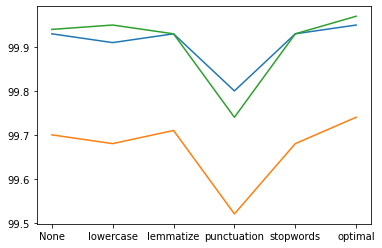

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

'''plt.figure(figsize=(12,10))
sns.scatterplot(change, score, hue=model)
plt.show()'''
plt.plot(change, score)

In [ ]:
fp_count = 0
print ("FALSE POSITIVES")
i = 0
while fp_count < 5 and i < len(bow_test):
  prediction = lin_clf.predict([bow_test[i]])
  if prediction != y_test.classification[i] and prediction == [True]:
    print(X_test.text[i], end = '\n\n')
    fp_count += 1
  i += 1

FALSE POSITIVES
Two Florida Republican lawmakers voted against a $15 billion hurricane relief bill just as Irma churned toward the state. Congressmen Matt Gaetz (R-FL) and Ted Yoho (R-FL) claim they have concerns about other provisions of the measure. Irma is now a Category 3 storm with maximum sustained winds of 125 mph but forecasters expect the storm to strengthen. Presently, the Florida Keys is facing a potentially catastrophic force that could threaten to drown entire islands.But, it s obviously more important for Gaetz and Yoho to exercise their conservative bonafides.The relief package sailed through the Senate and the House and was signed by Donald Trump on Friday. The package boosts funding for the Federal Emergency Management Agency (FEMA), a necessary move at this time following the destruction left by Hurricane Harvey and much more expected after Florida feels Irma s force and fury. Also, FEMA is running out of money so the funds are needed.The package will also raise the d

In [ ]:
fn_count = 0
print ("FALSE NEGATIVES")
i = 0
while fn_count < 5 and i < len(bow_test):
  prediction = lin_clf.predict([bow_test[i]])
  if prediction != y_test.classification[i] and prediction == [False]:
    print(X_test.text[i], end='\n\n')
    fn_count += 1
  i += 1

FALSE NEGATIVES
LONDON (Reuters) - Controversies over fake news have damaged trust in media in the United States and elsewhere, but the impact is far worse for social media and online-only outlets than it is for traditional print and TV outlets, a survey has found. The research and data company Kantar, in a survey of 8,000 people in the United States, Brazil, Britain and France, found that newspapers, magazines and TV news outlets had retained a greater measure of public trust than digital specialists had. In the United States, mainstream media have reported on the online spread of fabricated stories aimed at helping Donald Trump win the presidency last year. Meanwhile, Trump has accused the mainstream media itself of producing fake news. Overall, 58 percent of those surveyed said that as a result of becoming aware of fake news they had less trust in social media news stories about politics or elections. For mainstream media, the figure was 24 percent.  The efforts to brand  mainstream

In [ ]:
#CNN article
ad_ex = ["The Russian military is deploying additional forces to its southern flank, bolstering its positions in the Kherson and Zaporizhzhia regions, according to Ukrainian officials and videos posted on social media that were geolocated by CNN. Analysts suggest the move is presumably to try and counter an eventual Ukrainian counteroffensive."]
test = bow.transform(ad_ex).toarray()
print(lin_clf.predict(test))
print(logistic_model.predict(test))

[False]
[False]


In [ ]:
ad_ex = ["WASHINGTON (Reuters) - Trump said the state will go to court this Friday."]
test = bow.transform(ad_ex).toarray()
print(lin_clf.predict(test))
print(logistic_model.predict(test))

[ True]
[ True]


In [ ]:
#CNN article
ad_ex = ['''President Joe Biden said Wednesday he's "feeling great" and is back to working in person after isolating in the White House and recovering from what has been described as a mild case of Covid-19.''']
test = bow.transform(ad_ex).toarray()
print(lin_clf.predict(test))
print(logistic_model.predict(test))

[False]
[False]


In [ ]:
#Onion article
ad_ex = ["Announcing a major departure from its long history as an unsuccessful enterprise, struggling cosmetics company Serendipity Beauty Emporium rebranded Monday as good. “For years, the story of our company has been one of struggle, but today we are rewriting that narrative and making it all about how our company is doing really well,” said CEO Ted Dempsey, explaining that extensive in-house research showed potential investors in Serendipity Beauty Emporium would overwhelmingly prefer it be a successful company rather than one that is not very successful at all. “While we know our current financials and customer experience suggest things are going quite badly for us, this rebranding campaign turns that around 180 degrees and says, ‘No, things are good.’ We’re saying, ‘Take everything you’ve heard about our company and throw it out the window, because frankly, we don’t know how else we’re going to raise the capital we need to cover our operating expenses for the rest of the month.’” At press time, the business announced a plan to pivot from being bankrupt to being a highly profitable Fortune 500 company."]
test = bow.transform(ad_ex).toarray()
print(lin_clf.predict(test))
print(logistic_model.predict(test))

[ True]
[ True]


In [ ]:
print(true_news_data.text[42])

NEW YORK (Reuters) - A federal appeals court in Virginia on Thursday rejected a bid by President Donald Trump’s administration to prevent the U.S. military from accepting transgender recruits starting Jan. 1. The administration had urged the appeals court to suspend an order by a federal judge in Baltimore for the armed forces to begin accepting transgender recruits on that date. The administration has said the Jan. 1 start date was causing the armed forces to scramble to revise their policies at the risk of harming military readiness.  In a brief two-paragraph order, the three-judge panel of the Richmond-based 4th U.S. Circuit Court of Appeals said it was denying the administration’s request while the appeal proceeds. All three judges are Democratic appointees.  The court’s action could prompt the administration to ask the conservative-majority U.S. Supreme Court to intervene. “We disagree with the court’s ruling and are currently evaluating the next steps,” U.S. Justice Department sp

In [ ]:
ad_ex = ["A federal appeals court in Virginia on Thursday rejected a bid by President Donald Trump s administration to prevent the U.S. military from accepting transgender recruits starting Jan. 1. The administration had urged the appeals court to suspend an order by a federal judge in Baltimore for the armed forces to begin accepting transgender recruits on that date. The administration has said the Jan. 1 start date was causing the armed forces to scramble to revise their policies at the risk of harming military readiness.  In a brief two-paragraph order, the three-judge panel of the Richmond-based 4th U.S. Circuit Court of Appeals said it was denying the administration s request while the appeal proceeds. All three judges are Democratic appointees.  The court s action could prompt the administration to ask the conservative-majority U.S. Supreme Court to intervene. We disagree with the court’s ruling and are currently evaluating the next steps, U.S. Justice Department spokeswoman Lauren Ehrsam said in a statement. Several transgender service members, backed by the American Civil Liberties Union, filed suit in Maryland after Trump said in July he would ban transgender people from the military, a move that would reverse a policy of the Republican president s Democratic predecessor Barack Obama to accept them. Trump cited concern over military focus and medical costs. So far, three federal judges around the country have issued injunctions blocking Trump s ban. His administration has appealed all three rulings.  Joshua Block, an ACLU attorney who represents the plaintiffs in the Maryland case, said he was happy the appeals court saw through the government s smokescreen to further delay enlistment."]
test = bow.transform(ad_ex).toarray()
print(lin_clf.predict(test))
print(logistic_model.predict(test))

[ True]
[ True]


In [ ]:
def my_true_positives(y_true, y_pred, category):
  ### YOUR CODE HERE ###
  tp = 0
  for i in range(len(y_true)):
    if y_true[i] == y_pred[i] and y_true[i] == category:
      tp += 1

  return tp
  ### YOUR CODE HERE ###

def my_false_positives(y_true, y_pred, category):
  ### YOUR CODE HERE ###
  fp = 0
  for i in range(len(y_true)):
    if y_true[i] != category and y_pred[i] == category:
      fp += 1

  return fp
  ### YOUR CODE HERE ###

def my_precision(y_true, y_pred, category):
  ### YOUR CODE HERE ###
  tp = my_true_positives(y_true, y_pred, category)
  fp = my_false_positives(y_true, y_pred, category)
  precision = tp/(tp+fp)
  return precision
  ### END YOUR CODE ###

def my_false_negatives(y_true, y_pred, category):
  ### YOUR CODE HERE ###
  fn = 0
  for i in range(len(y_true)):
    if y_true[i] == category and y_pred[i] != category:
      fn += 1

  return fn
  ### YOUR CODE HERE ###

def my_recall(y_true, y_pred, category):
  ### YOUR CODE HERE ###
  tp = my_true_positives(y_true, y_pred, category)
  fn = my_false_negatives(y_true, y_pred, category)
  recall = tp/(tp+fn)
  return recall
  ### END YOUR CODE ###

def my_f_score(y_true, y_pred, category):
  ### YOUR CODE HERE ###
  precision = my_precision(y_true, y_pred, category)
  recall = my_recall(y_true, y_pred, category)

  f_score = 2 * (precision * recall) / (precision + recall)

  return f_score
  ### YOUR CODE HERE ###

In [ ]:
print(my_precision(y_test['classification'], predictions, False))
print(my_recall(y_test['classification'], predictions, False))
print(my_f_score(y_test['classification'], predictions, False))

0.9997418688693857
0.9996128532713898
0.9996773569077886


In [ ]:
print(my_precision(y_test['classification'], predictions, True))
print(my_recall(y_test['classification'], predictions, True))
print(my_f_score(y_test['classification'], predictions, True))

0.9995756118262837
0.9997170345217884
0.9996463181721724


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


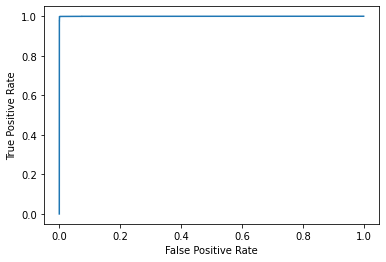

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#X, y = fetch_openml(data_id=1464, return_X_y=True)
#bow_train, _test, y_train, y_test = train_test_split(X, y, stratify=y)

clf = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
clf.fit(bow_train, y_train)

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

y_score = clf.decision_function(bow_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


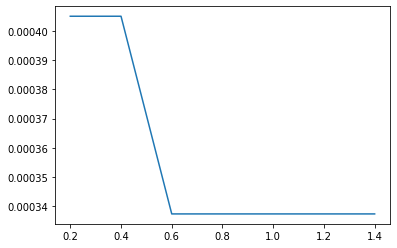

In [ ]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
#from sklearn.model_selection import HalvingGridSearchCV
#from sklearn.svm import SVC

depth = []
err = []



#score = accuracy_score(y_test, predictions)
#print('Linear SVC Model Accuracy: {:.2%}'.format(score))


for i in range(1,8):
  param_grid= {'kernel': ('linear', 'rbf'), 'C': [1, 10, 100]}
  base_estimator = svm.SVC(gamma='scale')
  # STEP 1: Initialization
  #random_forest_model = RandomForestRegressor(max_depth=i, random_state=0)
  lin_clf = svm.LinearSVC(C=i*.2, max_iter =100000)

  # STEP 2: Training
  #random_forest_model.fit(X_train, y_train)
  lin_clf.fit(bow_train, y_train.classification)

  # STEP 3: Prediction
  #predictions = random_forest_model.predict(X_test)
  predictions = lin_clf.predict(bow_test)


  # STEP 4: Evaluation
  error = mean_absolute_error(y_test, predictions)

  depth.append(i*.2)
  err.append(error)

plt.plot(depth, err)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


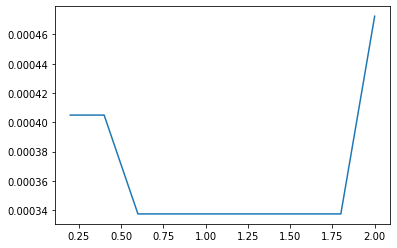

In [ ]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

depth = []
err = []



#score = accuracy_score(y_test, predictions)
#print('Linear SVC Model Accuracy: {:.2%}'.format(score))
#dual=True, loss = squared_hinge, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose = 0

for i in range(1,11):
  # STEP 1: Initialization
  #random_forest_model = RandomForestRegressor(max_depth=i, random_state=0)
  if i==0:
    lin_clf = svm.LinearSVC(intercept_scaling= .5, max_iter =100000)
  else:
    lin_clf = svm.LinearSVC(C=i*.2, max_iter =100000)

  # STEP 2: Training
  #random_forest_model.fit(X_train, y_train)
  lin_clf.fit(bow_train, y_train.classification)

  # STEP 3: Prediction
  #predictions = random_forest_model.predict(X_test)
  predictions = lin_clf.predict(bow_test)

  '''X = bow_train
  y = y_train

  sh = HalvingGridSearchCV(base_estimator, param_grid, cv=5, factor=2, min_resources=20).fit(X, y)'''

  # STEP 4: Evaluation
  error = mean_absolute_error(y_test, predictions)

  depth.append(i*.2)
  err.append(error)

plt.plot(depth, err)

In [ ]:
lin_clf = svm.LinearSVC(C=2, max_iter =100000)
lin_clf.fit(bow_train, y_train.classification)
predictions = lin_clf.predict(bow_test)

#mean_absolute_error(y_test, predictions)
accuracy_score(y_test, predictions)

0.9995275696834717

In [ ]:
y_train.classification.shape

(30081,)